<a href="https://colab.research.google.com/github/ShrutiChrist/Deep-Learning/blob/main/2348545_DL(LAB4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Implementing Dropout

### Importing the dataset

In [1]:
import pandas as pd
data=pd.read_csv('/content/Churn_Modelling (1).csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Dropping unnecessary features

In [2]:
data.drop(columns=['CustomerId','RowNumber','Surname'],inplace=True)

### One Hot Encoding

In [3]:
data=pd.get_dummies(data,columns=['Geography'])

### Label Encoding

In [4]:
data['Gender']=data['Gender'].apply(lambda x: 1 if x=='Male' else 0)
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


### Standardising

In [5]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
col=['CreditScore','Balance','EstimatedSalary','Age','Tenure','NumOfProducts']
for x in col:
    data[x]=mms.fit_transform(data[[x]])
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,0.538,0,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,1,0,0
1,0.516,0,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0,0,1
2,0.304,0,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,1,0,0
3,0.698,0,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,1,0,0
4,1.000,0,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0,0,1


### Separating Predictors and Target variable

In [6]:
X=data.drop(columns='Exited')
Y=data['Exited']

### Splitting the data into training and testing

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

### Importing necessary libraries and fitting the model without dropout

In [8]:
from keras.layers import Dense, Dropout, Activation
from keras.models import Sequential
model = Sequential([
    Dense(input_dim=12,units=64, activation='relu'),
    Dense(units=16, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

In [9]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [10]:
model.fit(X_train, y_train, epochs=100,
          batch_size=1000,
          validation_split=0.2)

Epoch 1/100
7/7 [==============================] - 1s 29ms/step - loss: 0.5713 - accuracy: 0.7922 - val_loss: 0.5249 - val_accuracy: 0.8075
Epoch 2/100
7/7 [==============================] - 0s 5ms/step - loss: 0.5262 - accuracy: 0.7922 - val_loss: 0.4907 - val_accuracy: 0.8075
Epoch 3/100
7/7 [==============================] - 0s 4ms/step - loss: 0.5077 - accuracy: 0.7922 - val_loss: 0.4775 - val_accuracy: 0.8075
Epoch 4/100
7/7 [==============================] - 0s 5ms/step - loss: 0.5010 - accuracy: 0.7922 - val_loss: 0.4706 - val_accuracy: 0.8075
Epoch 5/100
7/7 [==============================] - 0s 5ms/step - loss: 0.4951 - accuracy: 0.7922 - val_loss: 0.4649 - val_accuracy: 0.8075
Epoch 6/100
7/7 [==============================] - 0s 4ms/step - loss: 0.4896 - accuracy: 0.7922 - val_loss: 0.4610 - val_accuracy: 0.8075
Epoch 7/100
7/7 [==============================] - 0s 5ms/step - loss: 0.4857 - accuracy: 0.7922 - val_loss: 0.4576 - val_accuracy: 0.8075
Epoch 8/100
7/7 [=========

### Fitting the model with constant dropout

In [11]:
model1 = Sequential([
    Dense(input_dim=12,units=64, activation='relu'),
    Dropout(0.5),
    Dense(units=16, activation='relu'),
    Dropout(0.5),
    Dense(units=1, activation='sigmoid')
])

In [12]:
model1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [13]:
model1.fit(X_train, y_train, epochs=100,
          batch_size=1000,
          validation_split=0.2)

Epoch 1/100
7/7 [==============================] - 1s 25ms/step - loss: 0.7410 - accuracy: 0.4466 - val_loss: 0.6712 - val_accuracy: 0.6913
Epoch 2/100
7/7 [==============================] - 0s 5ms/step - loss: 0.6731 - accuracy: 0.5939 - val_loss: 0.6167 - val_accuracy: 0.8069
Epoch 3/100
7/7 [==============================] - 0s 5ms/step - loss: 0.6220 - accuracy: 0.6975 - val_loss: 0.5740 - val_accuracy: 0.8075
Epoch 4/100
7/7 [==============================] - 0s 5ms/step - loss: 0.5918 - accuracy: 0.7447 - val_loss: 0.5403 - val_accuracy: 0.8075
Epoch 5/100
7/7 [==============================] - 0s 6ms/step - loss: 0.5748 - accuracy: 0.7700 - val_loss: 0.5178 - val_accuracy: 0.8075
Epoch 6/100
7/7 [==============================] - 0s 5ms/step - loss: 0.5568 - accuracy: 0.7809 - val_loss: 0.5042 - val_accuracy: 0.8075
Epoch 7/100
7/7 [==============================] - 0s 5ms/step - loss: 0.5502 - accuracy: 0.7817 - val_loss: 0.4957 - val_accuracy: 0.8075
Epoch 8/100
7/7 [=========

### Fitting the model with varying dropout

In [14]:
model2 = Sequential([
    Dense(input_dim=12,units=64, activation='relu'),
    Dropout(0.4),
    Dense(units=16, activation='relu'),
    Dropout(0.3),
    Dense(units=1, activation='sigmoid')
])

In [15]:
model2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [16]:
model2.fit(X_train, y_train, epochs=100,
          batch_size=1000,
          validation_split=0.2)

Epoch 1/100
7/7 [==============================] - 1s 23ms/step - loss: 0.5926 - accuracy: 0.7347 - val_loss: 0.5404 - val_accuracy: 0.8075
Epoch 2/100
7/7 [==============================] - 0s 5ms/step - loss: 0.5517 - accuracy: 0.7781 - val_loss: 0.4982 - val_accuracy: 0.8075
Epoch 3/100
7/7 [==============================] - 0s 5ms/step - loss: 0.5328 - accuracy: 0.7889 - val_loss: 0.4805 - val_accuracy: 0.8075
Epoch 4/100
7/7 [==============================] - 0s 5ms/step - loss: 0.5322 - accuracy: 0.7906 - val_loss: 0.4719 - val_accuracy: 0.8075
Epoch 5/100
7/7 [==============================] - 0s 6ms/step - loss: 0.5250 - accuracy: 0.7895 - val_loss: 0.4671 - val_accuracy: 0.8075
Epoch 6/100
7/7 [==============================] - 0s 5ms/step - loss: 0.5210 - accuracy: 0.7914 - val_loss: 0.4645 - val_accuracy: 0.8075
Epoch 7/100
7/7 [==============================] - 0s 5ms/step - loss: 0.5132 - accuracy: 0.7906 - val_loss: 0.4611 - val_accuracy: 0.8075
Epoch 8/100
7/7 [=========

### Fitting the model with Monte Carlo dropout

In [17]:
model3 = Sequential([
    Dense(input_dim=12,units=64, activation='relu'),
    Dropout(0.2),
    Dense(units=16, activation='relu'),
    Dropout(0.2),
    Dense(units=1, activation='sigmoid')
])

In [18]:
model3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [19]:
for _ in range(100):
        model.fit(X_train, y_train, batch_size=1000, epochs=1, validation_split=0.2, verbose=0)
        model.reset_metrics()

In [20]:
import numpy as np
y_preds = np.stack([model3.predict(X_test) for _ in range(100)])
y_mean = np.mean(y_preds, axis=0)
y_std = np.std(y_preds, axis=0)

63/63 [==============================] - 0s 805us/step


### Making predictions

In [21]:
import numpy as np
Y_PREC = np.where(1 , model.predict(X_test) > 0.5, 0)
Y_PREC1 = np.where(1 , model1.predict(X_test) > 0.5, 0)
Y_PREC2 = np.where(1 , model2.predict(X_test) > 0.5, 0)
Y_PREC3 = np.where(1 , y_mean > 0.5, 0)

63/63 [==============================] - 0s 901us/step


### Evaluating the model

<BarContainer object of 4 artists>

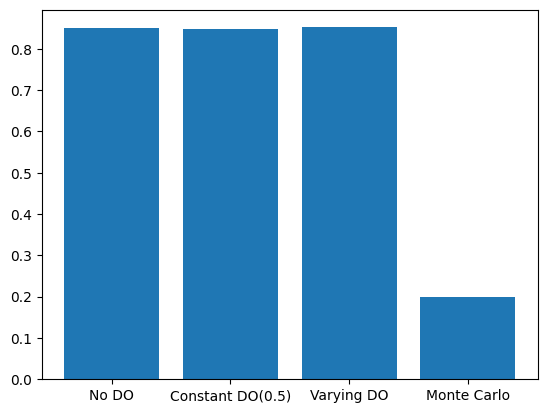

In [22]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
models=['No DO','Constant DO(0.5)','Varying DO','Monte Carlo']
acc=[accuracy_score(y_test,Y_PREC),accuracy_score(y_test,Y_PREC1),accuracy_score(y_test,Y_PREC2),accuracy_score(y_test,Y_PREC3)]
plt.bar(models,acc)

### Comparing using ROC curve

Text(0.5, 1.0, 'Receiver operating characteristic')

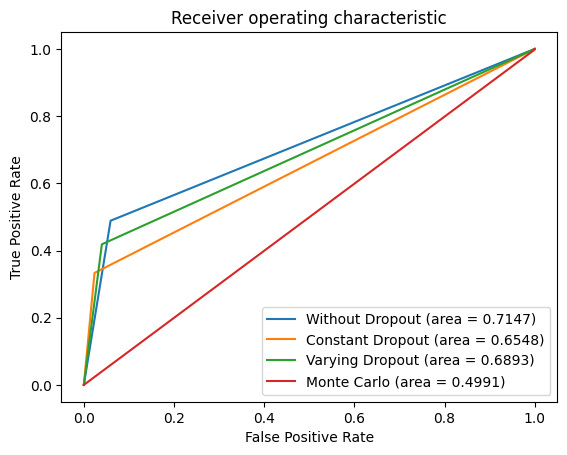

In [23]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
roc_auc=roc_auc_score(y_test,Y_PREC)
roc_auc1=roc_auc_score(y_test,Y_PREC1)
roc_auc2=roc_auc_score(y_test,Y_PREC2)
roc_auc3=roc_auc_score(y_test,Y_PREC3)
fpr, tpr,_= roc_curve(y_test,Y_PREC)
fpr1, tpr1,_= roc_curve(y_test,Y_PREC1)
fpr2, tpr2,_= roc_curve(y_test,Y_PREC2)
fpr3, tpr3,_= roc_curve(y_test,Y_PREC3)
plt.figure()
plt.plot(fpr, tpr,label='Without Dropout (area = %0.4f)' % roc_auc)
plt.plot(fpr1, tpr1, label='Constant Dropout (area = %0.4f)' % roc_auc1)
plt.plot(fpr2, tpr2, label='Varying Dropout (area = %0.4f)' % roc_auc2)
plt.plot(fpr3, tpr3, label='Monte Carlo (area = %0.4f)' % roc_auc3)
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')